In [726]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

In [727]:
random.seed(1314)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)

Preset Data

In [761]:
random_data = np.random.randint(10, size=(10240,100, 1) )

wiki plot: https://en.wikipedia.org/wiki/Activation_function#cite_note-15


library: https://www.tensorflow.org/api_docs/python/tf/keras/activations

graphs:https://mlfromscratch.com/activation-functions-explained/

# Mean

In [639]:
feature_data = Mean(random_data)

In [640]:
# best performance and time: relu ,softplus(the best one, 
# slower but also works:  gelu, swish
# activation functions with exponentials will not work on mean where the points have big slope changes do not fit.
mean_model = None
mean_model = Sequential([
    keras.layers.Flatten(input_shape=(100,1)),
#     keras.layers.Dense(128, activation= 'softplus'),
    keras.layers.Dense(64, activation= 'softplus'),
    keras.layers.Dense(32,activation= 'softplus'),
    keras.layers.Dense(16,activation= 'softplus'),
    keras.layers.Dense(8,activation= 'softplus'),
    keras.layers.Dense(4,activation= 'softplus'),
    keras.layers.Dense(2,activation= 'softplus'),
    keras.layers.Dense(1,activation= 'linear')
    
])

mean_model.compile(optimizer="adam", loss="mean_squared_error")


In [641]:
mean_model.fit(random_data, feature_data, epochs= 50)

Epoch 1/50
320/320 [==============================] - 1s 3ms/step - loss: 5.6446
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0186
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 4.5235e-04
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 2.4646e-04
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 1.3399e-04
Epoch 8/50
320/320 [==============================] - 1s 3ms/step - loss: 9.6008e-05
Epoch 9/50
320/320 [==============================] - 1s 3ms/step - loss: 6.6342e-05
Epoch 10/50
320/320 [==============================] - 1s 3ms/step - loss: 6.0049e-05
Epoch 11/50
320/320 [==============================] - 1s 3ms/step - loss: 4.6942e-05
Epoch 12/50
320/320 [==============================] - 1s 3ms/step - loss: 3.60

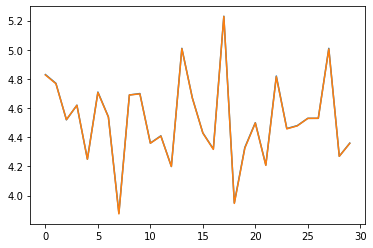

In [643]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))
plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_model.predict(Predirect_arr))

# STD

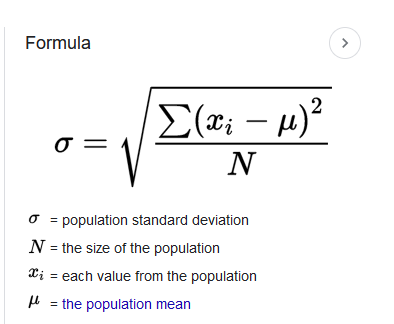

In [434]:
feature_data = Std(random_data)

In [435]:
# good performance: 
# not work: softplus elu gelu selu softsign swish tanh
std_model = Sequential([
    keras.layers.Flatten(input_shape=(100,1)),
    keras.layers.Dense(256, activation= 'tanh'),
    keras.layers.Dense(128, activation= 'selu'),
    keras.layers.Dense(64, activation= 'selu'),
    keras.layers.Dense(32,activation= 'selu'),
    keras.layers.Dense(16,activation= 'selu'),
    keras.layers.Dense(8,activation= 'selu'),
    keras.layers.Dense(4,activation= 'selu'),
    keras.layers.Dense(2,activation= 'selu'),
    keras.layers.Dense(1,activation= 'linear')
    
])

std_model.compile(optimizer="adam", loss="mean_absolute_error")


In [436]:
std_model.fit(random_data, feature_data, epochs= 200)

Epoch 1/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4249
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1034
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1021
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.0986
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0988
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0957
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0928
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.0905
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0914
Epoch 10/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0855
Epoch 11/200
250/250 [==============================] - 1s 4ms/step - loss: 0.0837
Epoch 12/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0835
Epoch 13/200


250/250 [==============================] - 1s 3ms/step - loss: 0.0227
Epoch 100/200
250/250 [==============================] - 1s 4ms/step - loss: 0.0246
Epoch 101/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0238
Epoch 102/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0236
Epoch 103/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0224
Epoch 104/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0231
Epoch 105/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0240
Epoch 106/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0225
Epoch 107/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0222
Epoch 108/200
250/250 [==============================] - 1s 4ms/step - loss: 0.0233
Epoch 109/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0223
Epoch 110/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 

250/250 [==============================] - 1s 3ms/step - loss: 0.0172
Epoch 197/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0172
Epoch 198/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0167
Epoch 199/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0159
Epoch 200/200
250/250 [==============================] - 1s 2ms/step - loss: 0.0167


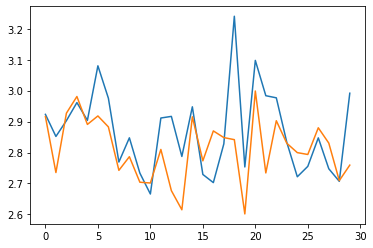

In [834]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_model.predict(Predirect_arr))

# Variance

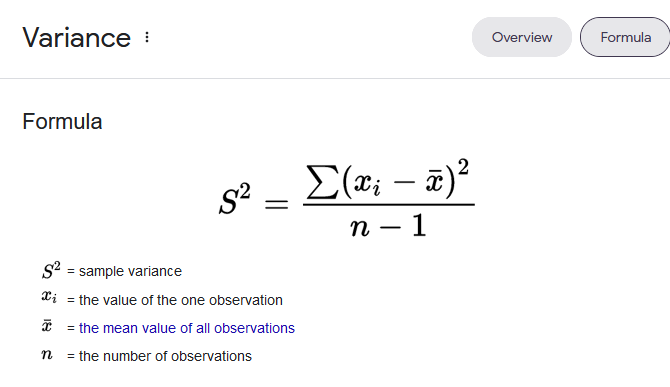

In [942]:
random_data3 = np.random.randint(10, size=(10000,100, 1) )

In [943]:
feature_data = Var(random_data3)

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [944]:
# relu alone does not work when a big change in slope, elu seems working well, swish better than selu
var_model = None
var_model = Sequential([
    # kernel_initializer="glorot_uniform"
    keras.layers.Flatten(input_shape=(100,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512,activation= 'swish'),
    keras.layers.Dense(256,activation= 'swish'),
    keras.layers.Dense(128,activation= 'swish'),
    keras.layers.Dense(64,activation= 'swish'),
    keras.layers.Dense(32,activation= 'swish'),
    keras.layers.Dense(16,activation= 'swish'),
    keras.layers.Dense(8,activation= 'swish'),
    keras.layers.Dense(4,activation= 'swish'),
    keras.layers.Dense(2,activation= 'swish'),

    keras.layers.Dense(1,activation= 'linear'),
    
])

var_model.compile(optimizer="adam", loss="mean_squared_error")

In [947]:
var_model.fit(random_data3, feature_data, epochs= 500)

Epoch 1/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0157
Epoch 2/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0151
Epoch 3/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0156
Epoch 4/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0155
Epoch 5/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0148
Epoch 6/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0194
Epoch 7/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0295
Epoch 8/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0350
Epoch 9/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0296
Epoch 10/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0219
Epoch 11/500
313/313 [==============================] - 2s 7ms/step - loss: 0.0183
Epoch 12/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0167
Epoch 13/500


313/313 [==============================] - 2s 6ms/step - loss: 0.0304
Epoch 100/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0299
Epoch 101/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0273
Epoch 102/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0292
Epoch 103/500
313/313 [==============================] - 2s 7ms/step - loss: 0.0304
Epoch 104/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0323
Epoch 105/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0369
Epoch 106/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0366
Epoch 107/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0346
Epoch 108/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0348
Epoch 109/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0398
Epoch 110/500
313/313 [==============================] - 2s 6ms/step - loss: 0.0499
Epoch 

313/313 [==============================] - 1s 5ms/step - loss: 0.0150
Epoch 197/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0128
Epoch 198/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0122
Epoch 199/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0125
Epoch 200/500
313/313 [==============================] - 1s 5ms/step - loss: 0.0120
Epoch 201/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 202/500
313/313 [==============================] - 1s 5ms/step - loss: 0.0132
Epoch 203/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0164
Epoch 204/500
313/313 [==============================] - 1s 5ms/step - loss: 0.0139
Epoch 205/500
313/313 [==============================] - 1s 5ms/step - loss: 0.0144
Epoch 206/500
313/313 [==============================] - 1s 5ms/step - loss: 0.0142
Epoch 207/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0133
Epoch 

313/313 [==============================] - 2s 5ms/step - loss: 0.0289
Epoch 294/500
313/313 [==============================] - 2s 5ms/step - loss: 0.0231
Epoch 295/500
313/313 [==============================] - 2s 5ms/step - loss: 0.1528
Epoch 296/500
313/313 [==============================] - 2s 5ms/step - loss: 0.4453
Epoch 297/500
313/313 [==============================] - 2s 5ms/step - loss: 0.3894
Epoch 298/500
313/313 [==============================] - 2s 5ms/step - loss: 0.3672
Epoch 299/500
313/313 [==============================] - 2s 5ms/step - loss: 0.3881
Epoch 300/500
313/313 [==============================] - 2s 6ms/step - loss: 0.3884
Epoch 301/500
313/313 [==============================] - 2s 6ms/step - loss: 0.2718
Epoch 302/500
313/313 [==============================] - 2s 5ms/step - loss: 0.1939
Epoch 303/500
313/313 [==============================] - 2s 5ms/step - loss: 0.1516
Epoch 304/500
313/313 [==============================] - 1s 5ms/step - loss: 0.1254
Epoch 

KeyboardInterrupt: 

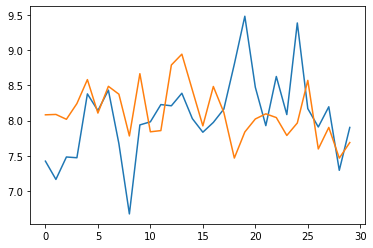

In [951]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))
plt.plot(range(30),np.var(Predirect_arr, axis=1),range(30),var_model.predict(Predirect_arr))